In [1]:
import numpy as np
from MXband import MXband

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("../phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("../volume")
qv = np.loadtxt("../path_vol") 
phase_get = np.load("../phase_get.npy")
d = np.loadtxt("../distance")
# dr = np.loadtxt("dr")
# dr=dr/cir
straight_get = np.load("../straight_get.npy")

srl_get=np.load("../srl_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 8, 12

speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

p=[0,0,0,0,1,0,0,1,0,0,1,0,0,1,0]

In [4]:
mb=MXband(phase,[80,180],straight_get,d,lower,upper,speedVar[0], speedVar[1],vol,px)
mb._solve()

conflict(s): 0
Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority  Blend          Objective      Nodes  Time (sec.)  DetTime (ticks)
    1         0      3   1.9011458333e+02       1397         0.17            69.40
status  = multi-objective optimal
time    = 0.172 s.
problem = MILP
gap     = 2.62999e+75%

object value: 38


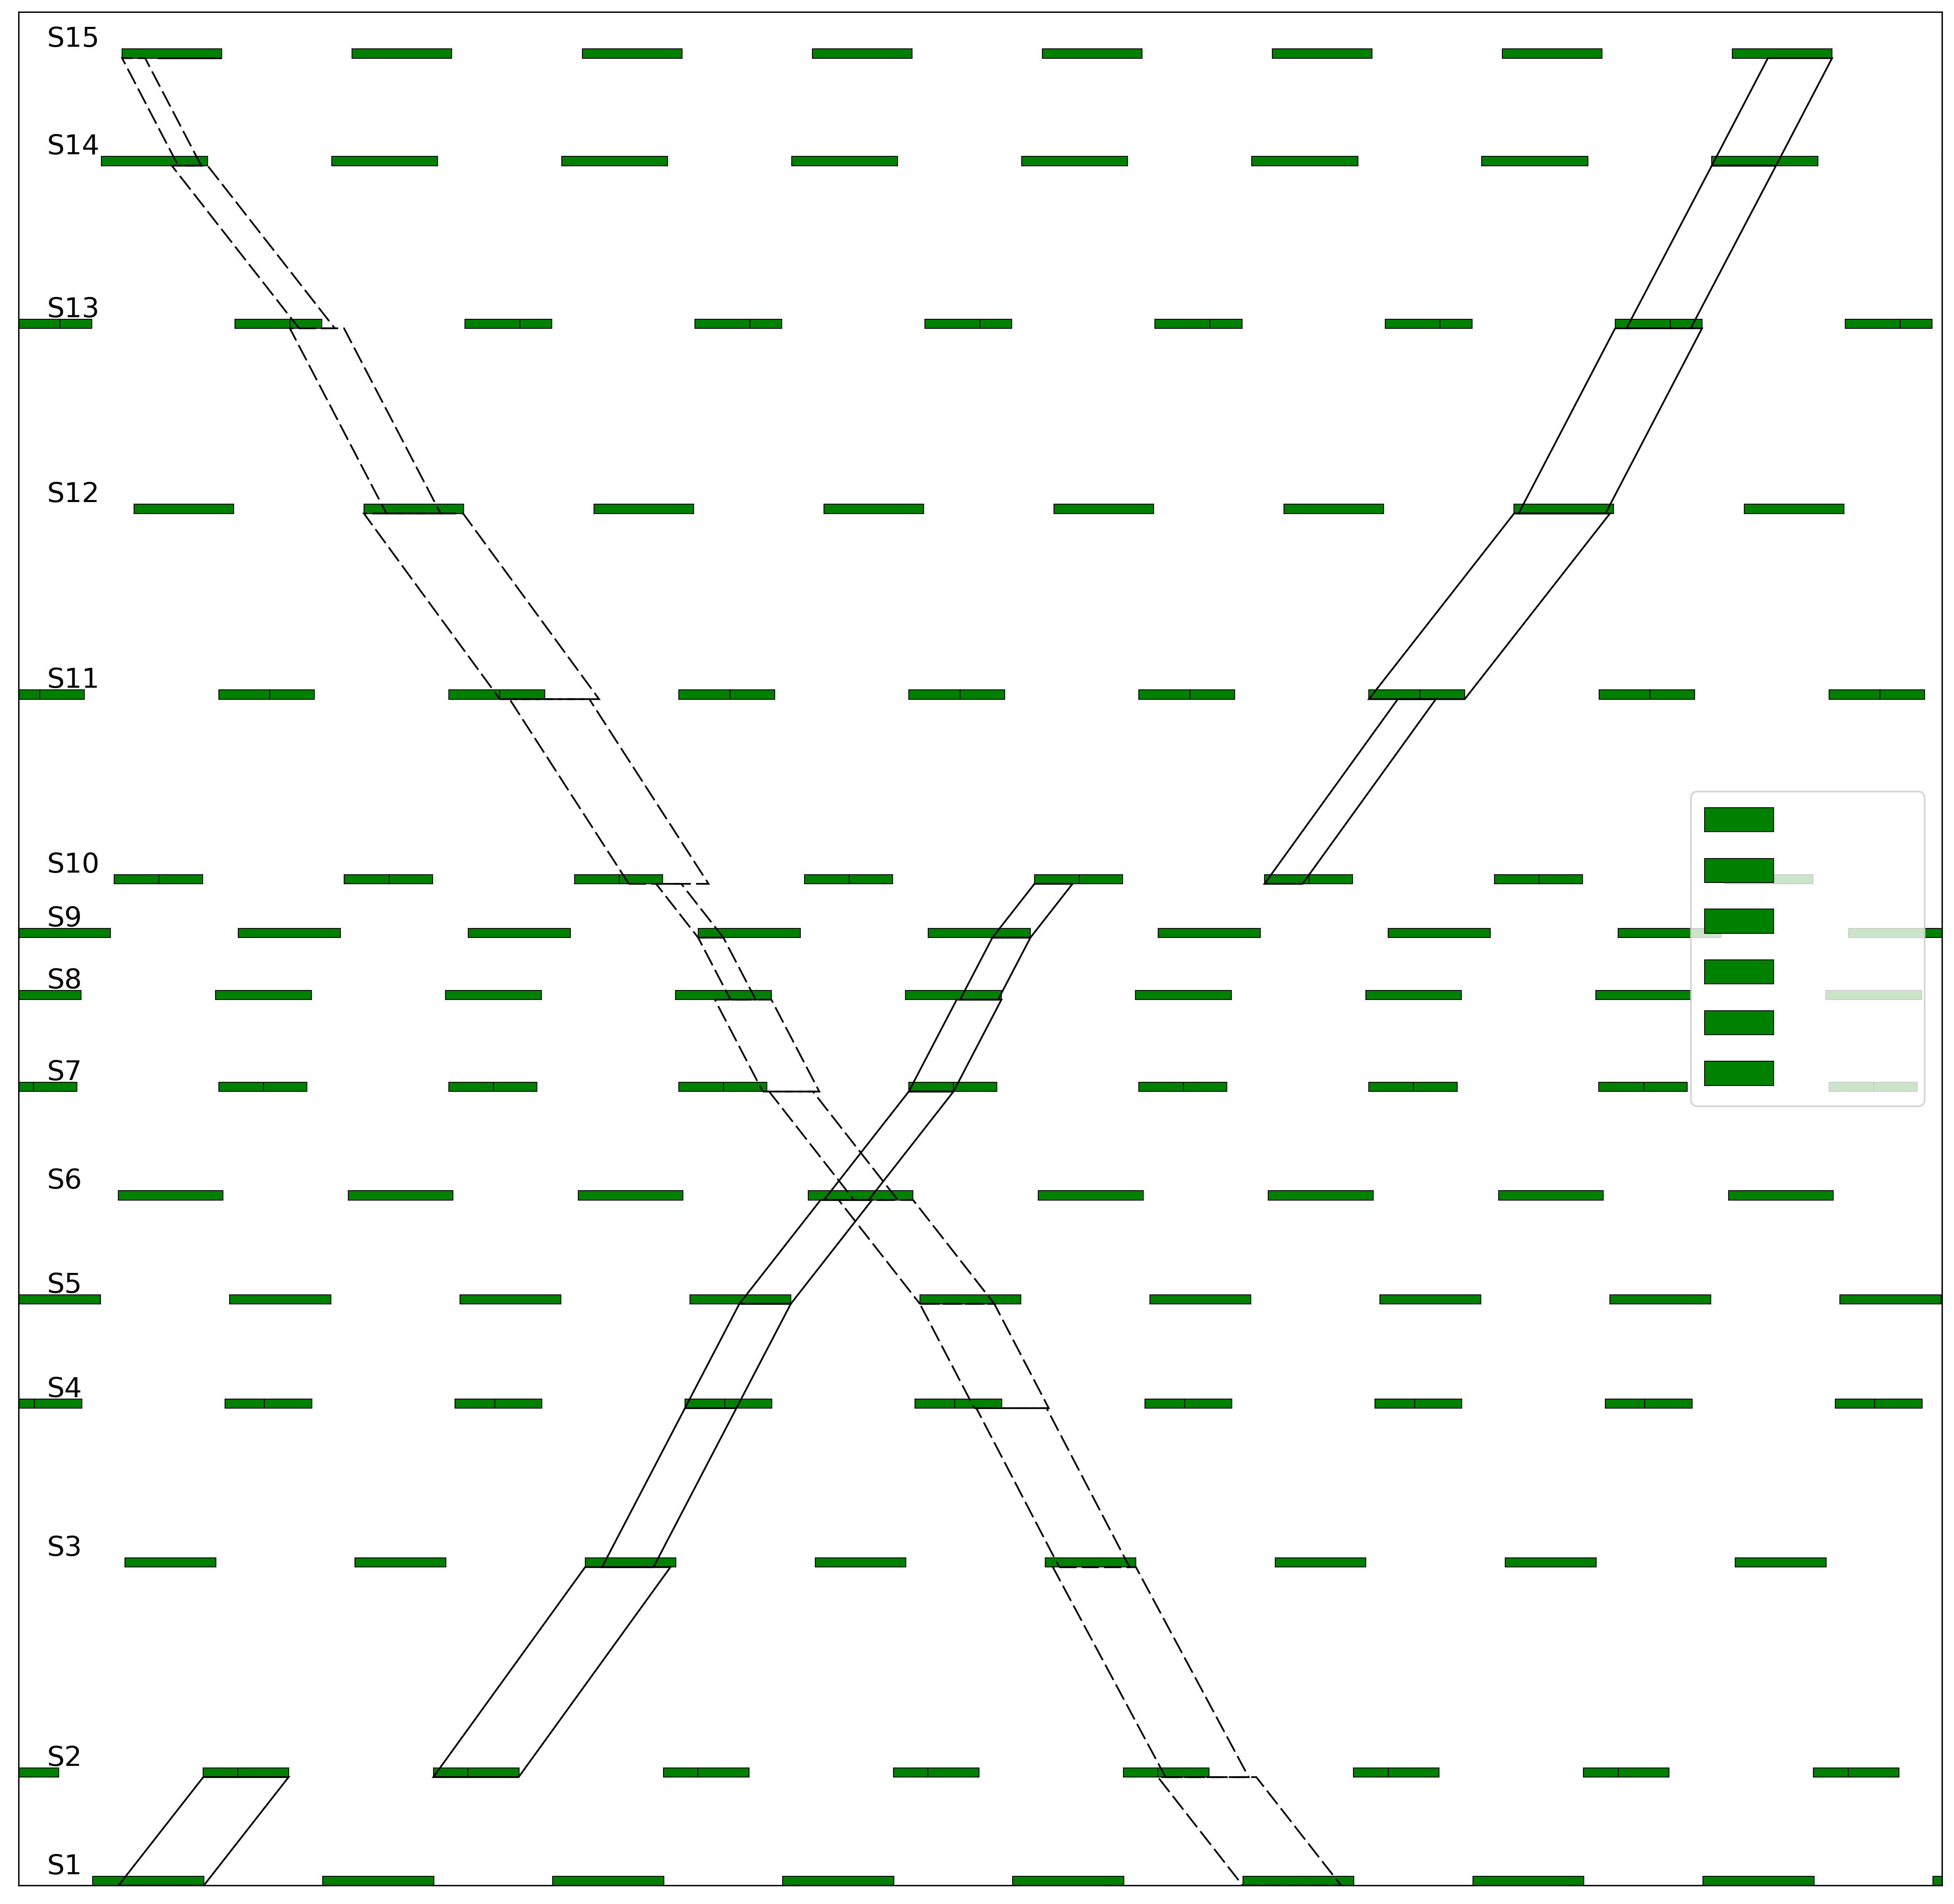

In [5]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
]
linestyles=[
    {"linestyle":"-" },
    {"linestyle":(5,(10,3))},
    {"linestyle":(0, (5, 3)) },
    {"linestyle":":" },
    {"linestyle":(0, (3, 1, 1, 1)) },
    {"linestyle": (0, (5, 10)) },
]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
mb.draw_car_bound("./时距图",colors,legends,2,linestyles)

In [6]:
mb.get_dataframe()

,cross_number,distance,sg1,sg2,b1,b2,offset,p,t1,t2,z,u1,u2,w1,car_t1,w2,car_t2
0,1.0,236.0,0.483333,0.483333,29.666667,34.222222,0.000000,0.0,29.500000,29.500000,80.0,0.0,0.0,0.297917,34.777778,0.213889,25.777778
1,2.0,457.0,0.372222,0.427778,29.666667,34.222222,30.500000,0.0,52.791667,39.208333,80.0,0.0,0.0,0.185417,64.277778,0.213889,76.277778
2,3.0,346.0,0.394444,0.394444,17.888889,28.888889,2.402778,0.0,28.833333,28.833333,80.0,0.0,0.0,0.185417,42.958333,0.213889,39.736111
3,4.0,227.0,0.377778,0.400000,17.888889,24.444444,37.569444,0.0,18.916667,18.916667,80.0,0.0,0.0,0.111806,71.791667,0.247222,93.125000
4,5.0,226.0,0.438889,0.438889,17.888889,25.888889,45.041667,0.0,28.250000,28.250000,80.0,0.0,0.0,0.327083,90.708333,0.161806,73.486111
5,6.0,236.0,0.455556,0.455556,15.555556,25.888889,8.902778,0.0,29.500000,29.500000,80.0,0.0,0.0,0.165278,40.125000,0.293750,45.236111
6,7.0,200.0,0.383333,0.388889,15.555556,15.222222,36.291667,0.0,16.666667,16.666667,80.0,0.0,0.0,0.097222,69.625000,0.293750,101.069444
7,8.0,135.0,0.416667,0.416667,13.222222,19.666667,41.847222,0.0,11.250000,11.250000,80.0,0.0,0.0,0.319444,87.458333,0.293750,82.180556
8,9.0,117.0,0.444444,0.444444,13.222222,8.777778,50.597222,0.0,14.625000,14.625000,80.0,0.0,0.0,0.361806,98.708333,0.054861,76.375000
9,10.0,402.0,0.383333,0.388889,13.222222,8.777778,0.000000,0.0,46.361111,41.472222,80.0,0.0,0.0,0.082639,33.333333,0.215625,61.750000
